<a href="https://colab.research.google.com/github/prashant1519/Assigment/blob/master/Google_PlayStore_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sns

**Data cleaning of First Dataset**

In [ ]:
# getting the actual dataset
data = pd.read_csv("/content/Play Store Data (1).csv")
data2 = pd.read_csv("/content/User Reviews.csv")

In [ ]:
# converting dataset to dataframe
df1 = pd.DataFrame(data)

In [ ]:
# Display first 5 rows
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
# Display information about dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# count the null values
df1.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
# Filling mean value in place of null values
df1['Rating'].fillna(np.mean(df1['Rating']),inplace=True)

In [ ]:
# Drop null rows from Type column
df1.dropna(subset=['Type'],how='all',inplace=True)

In [ ]:
# Dropping null rows from content_Rating column
df1.dropna(subset=['Content Rating'],how='all',inplace=True)

In [ ]:
# Drop null value from columns
df1.dropna(subset=['Android Ver'],how='all',inplace=True)
df1.dropna(subset=['Current Ver'],how='all',inplace=True)

In [ ]:
# Count null values
df1.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
# count duplicated values
df1.duplicated().sum()

483

In [ ]:
# Dropping duplicted values from dataframe
df1.drop_duplicates(inplace=True)

In [ ]:
# checking again for duplicated values if any left
df1.duplicated().sum()

0

In [ ]:
# checking the new cleaned dataframe
df1.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# getting all the datatypes
df1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
# Converting Reviews to float datatype
df1['Reviews'] = df1['Reviews'].astype(float)

In [ ]:
# Counting the Top 10 Values in the 'Size' Column of DataFrame df1
df1['Size'].value_counts().head(10)

Varies with device    1525
11M                    187
12M                    186
13M                    186
14M                    181
15M                    174
17M                    155
26M                    145
16M                    143
19M                    135
Name: Size, dtype: int64

In [ ]:
# using string method to replace
df1['Installs'] = df1['Installs'].str.replace('+','')

<ipython-input-19-be6dfc45f3c6>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Installs'] = df1['Installs'].str.replace('+','')


In [ ]:
# display first 5 rows of Installs column
df1['Installs'].head()

0        10,000
1       500,000
2     5,000,000
3    50,000,000
4       100,000
Name: Installs, dtype: object

In [ ]:
# converting object to float
df1['Installs'] = df1['Installs'].str.replace(',','').astype(float)

In [ ]:
# Display all datatypes
df1.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size               object
Installs          float64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
# Display dtype of price column
df1['Price'].dtype

dtype('O')

In [ ]:
# converting from object to float
df1['Price'] = df1['Price'].str.replace('$','').astype(float)

<ipython-input-24-06e53ee7add2>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Price'] = df1['Price'].str.replace('$','').astype(float)


In [ ]:
# checking whether datatype conversion happened or not
df1.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size               object
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
# renaming all column which contain spaces between them
df1.rename(columns={'Current Ver':'Current_Ver','Content Rating':'Content_Rating','Last Updated':'Last_Updated','Android Ver':'Android_Ver'},inplace=True)

In [ ]:
# checking column names as renaming done
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

In [ ]:
# checking size columns
df1.Size.value_counts()

Varies with device    1525
11M                    187
12M                    186
13M                    186
14M                    181
                      ... 
721k                     1
430k                     1
429k                     1
200k                     1
619k                     1
Name: Size, Length: 457, dtype: int64

In [ ]:
# # Replace 'k' with '000' in the 'Size' column of DataFrame df1
df1['Size'] = df1['Size'].str.replace('k','000')

In [ ]:

# Replace 'M' with '000000' in the 'Size' column of DataFrame df1
df1['Size'] = df1['Size'].str.replace('M','000000')

In [ ]:
# Counting Occurrences of Unique Values in the 'Size' Column of DataFrame df1
df1.Size.value_counts()

Varies with device    1525
11000000               187
12000000               186
13000000               186
14000000               181
                      ... 
721000                   1
430000                   1
429000                   1
200000                   1
619000                   1
Name: Size, Length: 457, dtype: int64

In [ ]:
# Displaying the Last 10 Entries in the 'Size' Column of DataFrame df1
df1['Size'].tail(10)

10831             9.8000000
10832                582000
10833                619000
10834             2.6000000
10835             9.6000000
10836              53000000
10837             3.6000000
10838             9.5000000
10839    Varies with device
10840              19000000
Name: Size, dtype: object

In [ ]:
# Randomly Sampling 10 Entries from the First 20 Entries in the 'Size' Column of DataFrame df1
df1['Size'].head(20).sample(10)

3      25000000
18     39000000
0      19000000
11     12000000
12     20000000
9     3.1000000
14     37000000
17     17000000
2     8.7000000
1      14000000
Name: Size, dtype: object

In [ ]:
# Filtering DataFrame df1 to Retrieve Rows Where the 'Size' Column is 'Varies with device
df1[df1['Size']=='Varies with device']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639.0,Varies with device,5000000.0,Free,0.0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221.0,Varies with device,10000000.0,Free,0.0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057.0,Varies with device,1000000.0,Free,0.0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211.0,Varies with device,5000000.0,Free,0.0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356.0,Varies with device,100000.0,Free,0.0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471.0,Varies with device,100000.0,Free,0.0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8.0,Varies with device,1000.0,Free,0.0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622.0,Varies with device,100000.0,Free,0.0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486.0,Varies with device,5000000.0,Free,0.0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


In [ ]:
# Checking for Presence of 'Varies with device' in the Size Column of DataFrame df1
df1['Size'].isin(['Varies with device']).any(axis=0)

True

In [ ]:
# Replacing 'Varies with device' with '0' in the Size Column of DataFrame df1
df1['Size'] = df1['Size'].str.replace('Varies with device','0')

In [ ]:
# converting 'size' column form object to float
df1['Size'] = df1['Size'].astype(float)

In [ ]:
# Display all Data-Types of the Dataframe
df1.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content_Rating     object
Genres             object
Last_Updated       object
Current_Ver        object
Android_Ver        object
dtype: object

In [ ]:
# Display first 5 rows
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Calculate quartiles and IQR
q1 = df1['Price'].quantile(0.25)
q3 = df1['Price'].quantile(0.75)
iqr = q3 - q1

# Calculate lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outliers = df1[(df1['Price'] < lower_bound) | (df1['Price'] > upper_bound)]
print("Outliers:")
print(outliers)

Outliers:
                                                 App            Category  \
234    TurboScan: scan documents and receipts in PDF            BUSINESS   
235                   Tiny Scanner Pro: PDF Doc Scan            BUSINESS   
427                               Puffin Browser Pro       COMMUNICATION   
476                        Moco+ - Chat, Meet People              DATING   
477                                       Calculator              DATING   
...                                              ...                 ...   
10735                                    FP VoiceBot              FAMILY   
10760                                Fast Tract Diet  HEALTH_AND_FITNESS   
10782                        Trine 2: Complete Story                GAME   
10785                                   sugar, sugar              FAMILY   
10798                           Word Search Tab 1 FR              FAMILY   

         Rating  Reviews        Size  Installs  Type  Price Content_Rating  \

**Data cleaning of Second Dataset**

In [ ]:
# Creating DataFrame df2 from data2
df2 = pd.DataFrame(data2)

In [ ]:
#Display First 5 Rows
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
# Displaying Information About the DataFrame df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34965 entries, 0 to 34964
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     34965 non-null  object 
 1   Translated_Review       20375 non-null  object 
 2   Sentiment               20378 non-null  object 
 3   Sentiment_Polarity      20378 non-null  float64
 4   Sentiment_Subjectivity  20378 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.3+ MB


In [ ]:
# Summary Statistics for DataFrame df2
df2.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,20378.000000,20378.000000
mean,0.182017,0.493597
std,0.350535,0.256685
min,-1.000000,0.000000
25%,0.000000,0.358940
50%,0.150000,0.516667
75%,0.400000,0.650000
max,1.000000,1.000000


In [ ]:
# Count of Missing Values After Removal in DataFrame df2
df2.isna().sum()

App                           0
Translated_Review         14590
Sentiment                 14587
Sentiment_Polarity        14587
Sentiment_Subjectivity    14587
dtype: int64

In [ ]:
# Dropping Rows with Missing Values from DataFrame df2
df2.dropna(inplace=True)

In [ ]:
# Count of Missing Values in DataFrame df2
df2.isna().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [ ]:
# Count of Duplicated Rows After Removal in DataFrame df2
df2.duplicated().sum()

4174

In [ ]:
# Removing Duplicate Rows from DataFrame df2
df2.drop_duplicates(inplace=True)

In [ ]:
# Count of Duplicated Rows in DataFrame df2
df2.duplicated().sum()

0

In [ ]:
# Display the Dataframe
df2

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
34937,DisneyNOW – TV Shows & Games,Well awsome really helpful I try play video sa...,Negative,-0.112500,0.412500
34940,DisneyNOW – TV Shows & Games,It's nice kids want watch show demand cable. H...,Positive,0.050000,0.775000
34952,DisneyNOW – TV Shows & Games,lot shows I never got watch really good impact...,Positive,0.553125,0.543750
34960,DisneyNOW – TV Shows & Games,It's great except I complaint: Most episodes l...,Positive,0.333333,0.483333


**Now starting visualizing df1**

*(Play Store Dataset)*

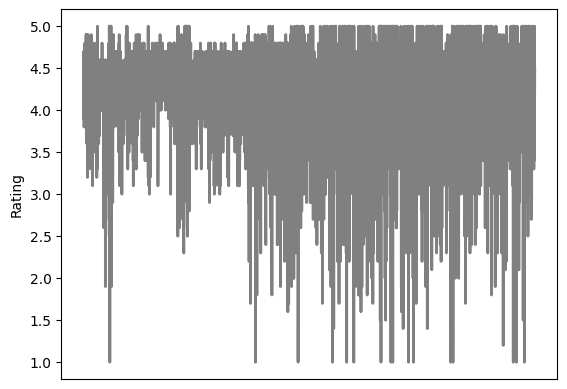

In [ ]:
# Line Plot of Rating from DataFrame df1 using Matplotlib
mpl.plot(df1['Rating'],color='grey',linewidth=2)
mpl.ylabel('Rating')
mpl.xticks([]);

<Axes: xlabel='Reviews', ylabel='Count'>

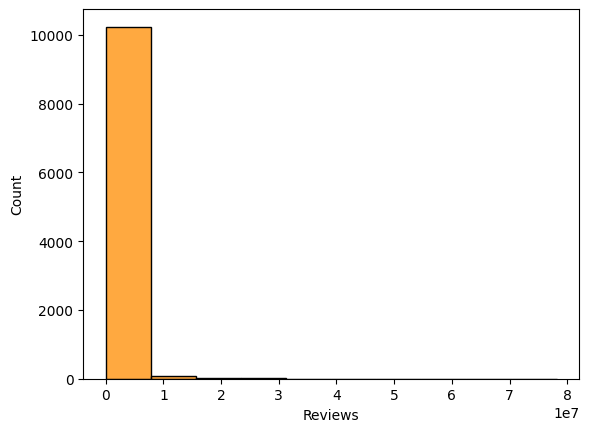

In [ ]:
# counting the number of reviews

sns.histplot(df1['Reviews'],color='darkorange',bins=10)


<Axes: xlabel='Size', ylabel='Count'>

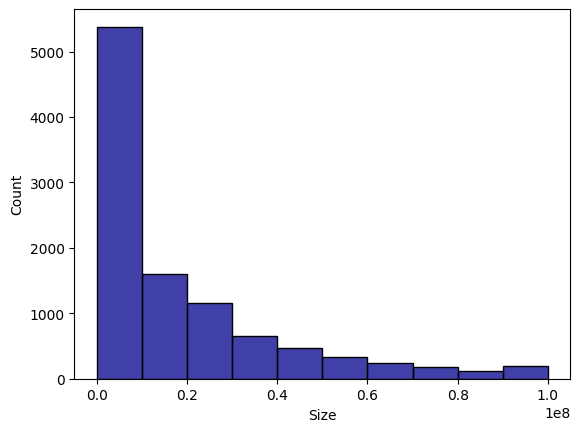

In [ ]:
# plotting Size column

sns.histplot(df1['Size'],color='darkblue',bins=10)


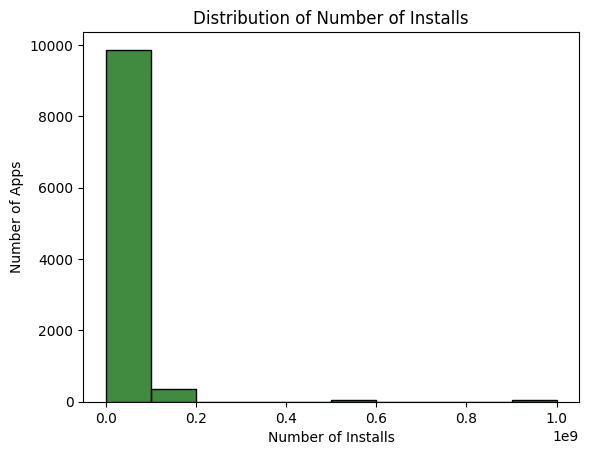

In [ ]:
#  Title: Distribution of App Installs
sns.histplot(df1['Installs'],color='darkgreen',bins=10)
mpl.xlabel('Number of Installs')
mpl.ylabel('Number of Apps')
mpl.title('Distribution of Number of Installs')
mpl.show()


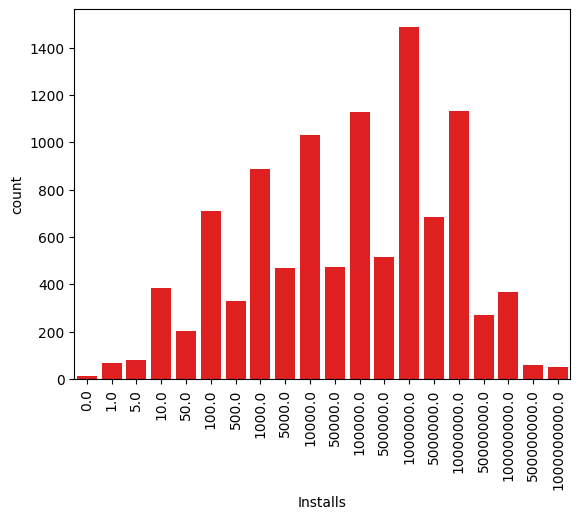

In [ ]:
sns.countplot(data=df1,x='Installs',color='red')
mpl.xticks(rotation=90);

In [ ]:
# Converting 'App' column to category type in DataFrame df1
df1['App'] = df1['App'].astype('category')


In [ ]:
# Count of Genres in DataFrame df1
df1.Genres.value_counts()


Tools                                840
Entertainment                        587
Education                            526
Business                             427
Medical                              408
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Lifestyle;Pretend Play                 1
Tools;Education                        1
Strategy;Creativity                    1
Name: Genres, Length: 119, dtype: int64

<Axes: xlabel='Genres', ylabel='count'>

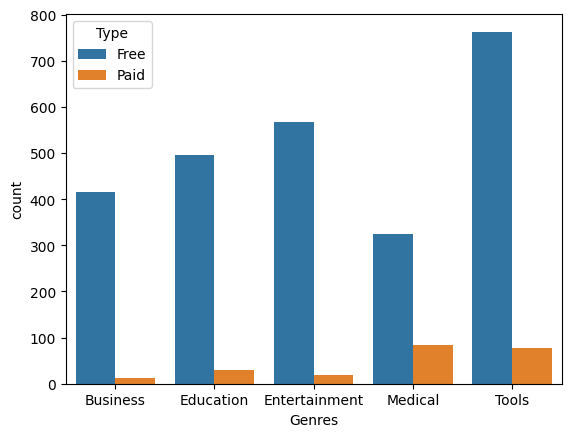

In [ ]:
# Count Plot: Genres with Type as Hue for Selected Genres
sns.countplot(data=df1[df1['Genres'].isin(['Tools','Entertainment','Education','Business','Medical','Creativity'])],x='Genres',hue='Type')

<ipython-input-60-f688d5209cd8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1,x='Category',palette='RdYlBu',width=1.5,legend=False)


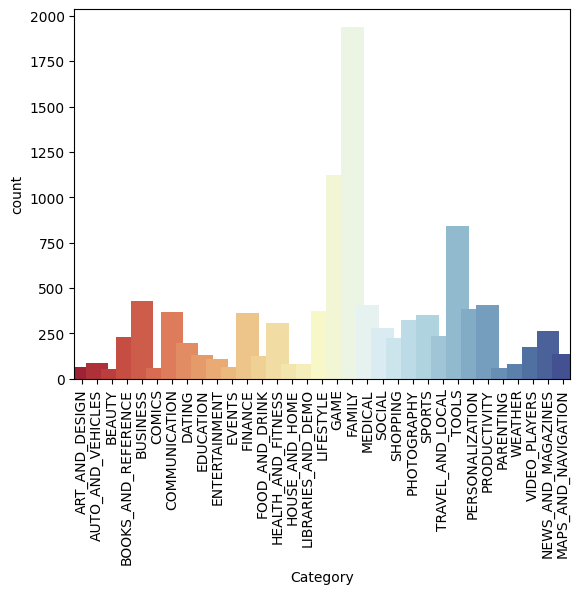

In [ ]:

# Count Plot: Category
sns.countplot(data=df1,x='Category',palette='RdYlBu',width=1.5,legend=False)
mpl.xticks(rotation=90);

<Axes: xlabel='Type', ylabel='count'>

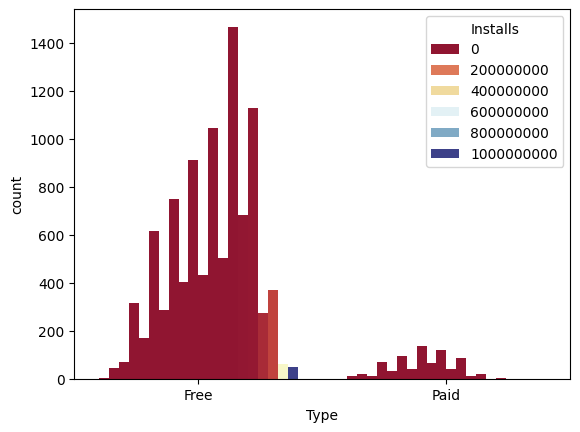

In [ ]:
# Count Plot: Type with Installs as Hue
sns.countplot(data=df1,x='Type',hue='Installs',palette='RdYlBu')

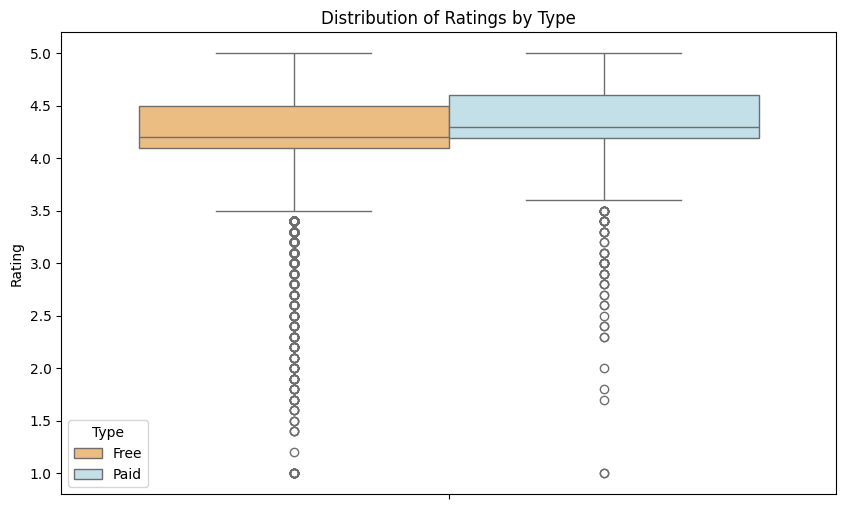

In [ ]:
# Creating a Boxplot of Ratings by Type

mpl.figure(figsize=(10, 6))
#sns.boxplot(x='Category', y='Rating', data=df1,palette='RdYlBu')
sns.boxplot(hue='Type', y='Rating', data=df1,palette='RdYlBu')
mpl.title('Distribution of Ratings by Type')
mpl.xticks(rotation=90)
mpl.show()

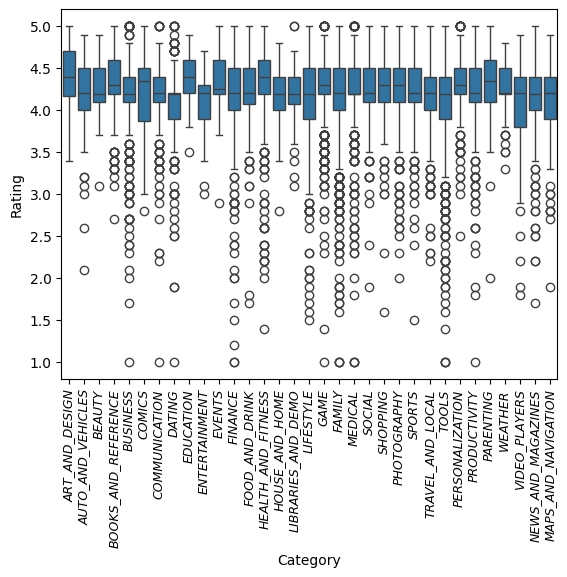

In [ ]:
# Box Plot: Rating by Category
sns.boxplot(data=df1,x='Category',y='Rating')
mpl.xticks(rotation=90,fontsize=9.0,fontstyle='italic',fontweight=5.5);

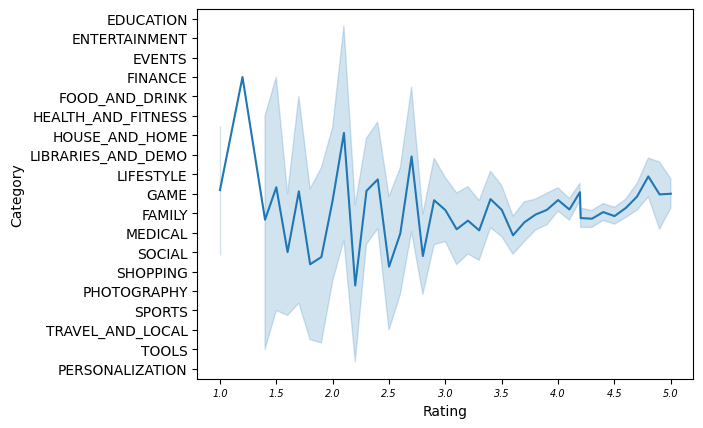

In [ ]:
# Line Plot: Rating vs. Category
sns.lineplot(data=df1,x='Rating',y='Category')
mpl.xticks(rotation=0,fontsize=7.0,fontstyle='italic',fontweight=5.5);

In [ ]:
# Count of Genres in DataFrame df1
df1['Genres'].value_counts() # can be used as hue

Tools                                840
Entertainment                        587
Education                            526
Business                             427
Medical                              408
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Lifestyle;Pretend Play                 1
Tools;Education                        1
Strategy;Creativity                    1
Name: Genres, Length: 119, dtype: int64

<Axes: xlabel='Installs', ylabel='Content_Rating'>

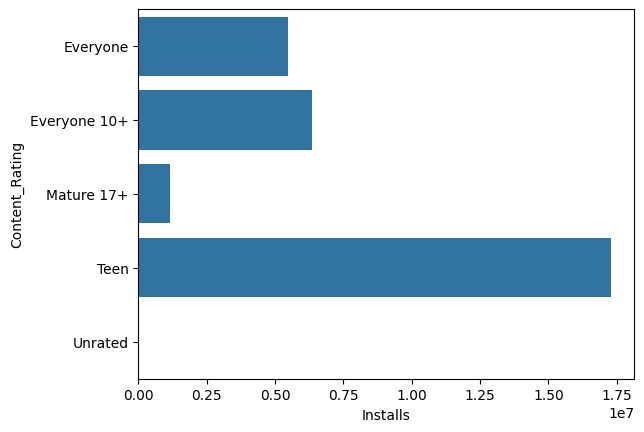

In [ ]:
# Bar Plot: Installs vs. Content Rating for Selected Genres
sns.barplot(data=df1[df1['Genres'].isin(['Tools','Entertainment','Education','Business','Medical'])],x='Installs',y='Content_Rating',errorbar=None)

In [ ]:
# Count of Genres in DataFrame df1
df1['Genres'].value_counts()

Tools                                840
Entertainment                        587
Education                            526
Business                             427
Medical                              408
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Lifestyle;Pretend Play                 1
Tools;Education                        1
Strategy;Creativity                    1
Name: Genres, Length: 119, dtype: int64

In [ ]:
# Top 10 Categories by Count in DataFrame df1
df1['Category'].value_counts().head(10)

FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: Category, dtype: int64

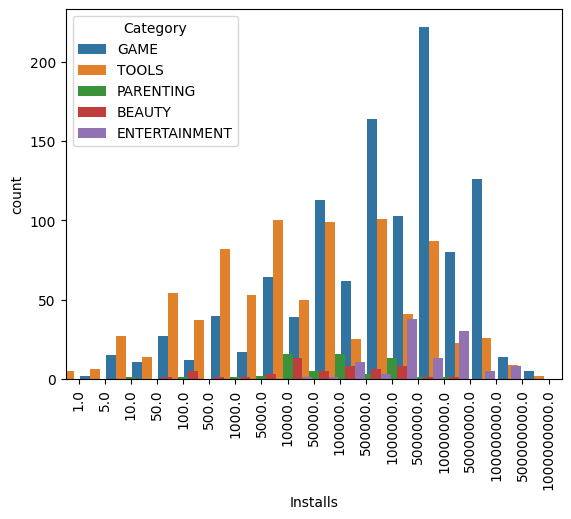

In [ ]:
# Count Plot: Installs by Category for Selected Categories
sns.countplot(data=df1[df1['Category'].isin(['Family','GAME','TOOLS','BEAUTY','PARENTING','ENTERTAINMENT'])],x='Installs',hue='Category',width=1.9)
mpl.xticks(rotation=90);

In [ ]:
# Count of Last Updated Dates in DataFrame df1
df1['Last_Updated'].value_counts()

August 3, 2018        298
August 2, 2018        270
July 31, 2018         269
August 1, 2018        257
July 30, 2018         195
                     ... 
January 16, 2016        1
September 13, 2015      1
October 7, 2015         1
January 12, 2016        1
March 23, 2014          1
Name: Last_Updated, Length: 1376, dtype: int64

In [ ]:
# Count of Unique Apps in DataFrame df1
df1['App'].value_counts()

ROBLOX                                               9
8 Ball Pool                                          7
Bubble Shooter                                       6
Helix Jump                                           6
Zombie Catchers                                      6
                                                    ..
Dine In CT - Food Delivery                           1
Dino Defends king 3 – Dinosaur T rex Hunter Games    1
Dino T-Rex                                           1
Dino War: Rise of Beasts                             1
🔥 Football Wallpapers 4K | Full HD Backgrounds 😍     1
Name: App, Length: 9648, dtype: int64

<Axes: xlabel='Installs', ylabel='count'>

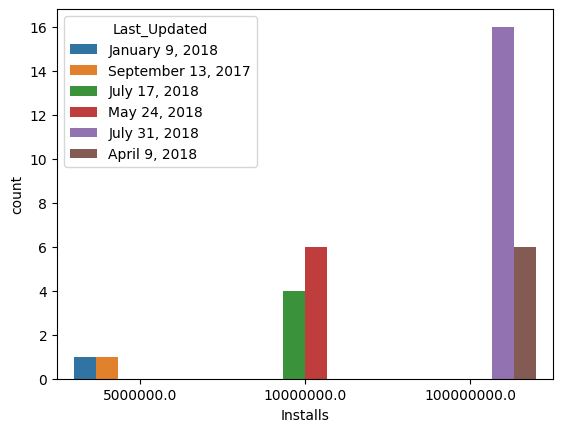

In [ ]:
# Count Plot: Installs with Last Updated as Hue for Selected Apps
sns.countplot(data=df1[df1['App'].isin(['ROBLOX','8 Ball Pool','Zombie Catchers','Helix Jump','Bubble Shooter'])],x='Installs',hue='Last_Updated')

In [ ]:
# Display first 5 rows of the DataFrame
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Converting 'App' column to string type in DataFrame df1
df1['App'] = df1['App'].astype(str)

In [ ]:
# Count of Apps in DataFrame df1
df1['App'].value_counts()

ROBLOX                                           9
8 Ball Pool                                      7
Zombie Catchers                                  6
Helix Jump                                       6
Bubble Shooter                                   6
                                                ..
Popsicle Launcher for Android P 9.0 launcher     1
PixelLab - Text on pictures                      1
P Launcher for Android™ 9.0                      1
Pacify (Android P theme) - Theme for Xperia™     1
iHoroscope - 2018 Daily Horoscope & Astrology    1
Name: App, Length: 9648, dtype: int64

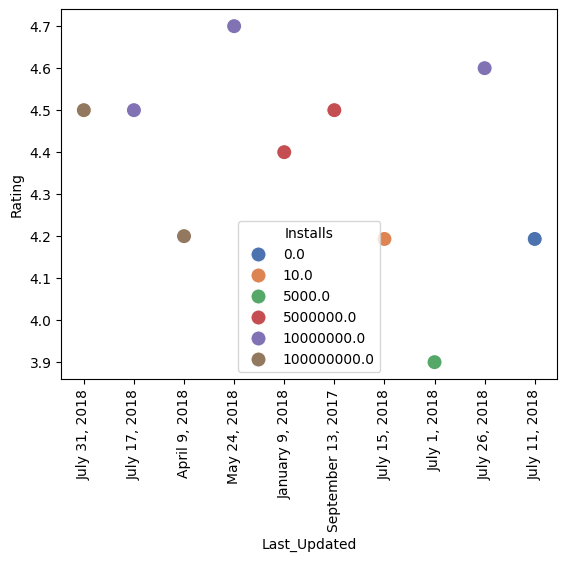

In [ ]:

# Scatterplot: Last Updated vs. Rating with Installs as Hue
import matplotlib.colors as mc
sns.scatterplot(data=df1[df1['App'].isin(['ROBLOX','8 BALL Pool','Bubble Shooter','Helix Jump','Zombie Catchers','Popsicle Launcher for Android P 9.0 launcher','PixelLab - Text on pictures','P Launcher for Android™ 9.0','Pacify (Android P theme) - Theme for Xperia™'])],x='Last_Updated',y='Rating',hue='Installs',hue_norm=mc.PowerNorm(6),palette='deep',s=120)
mpl.xticks(rotation=90);

In [ ]:
# Getting first 5 rows of the head column from DataFrame
df1['Size'].head()

0    19000000.0
1    14000000.0
2           8.7
3    25000000.0
4           2.8
Name: Size, dtype: float64

<Axes: xlabel='Rating', ylabel='Category'>

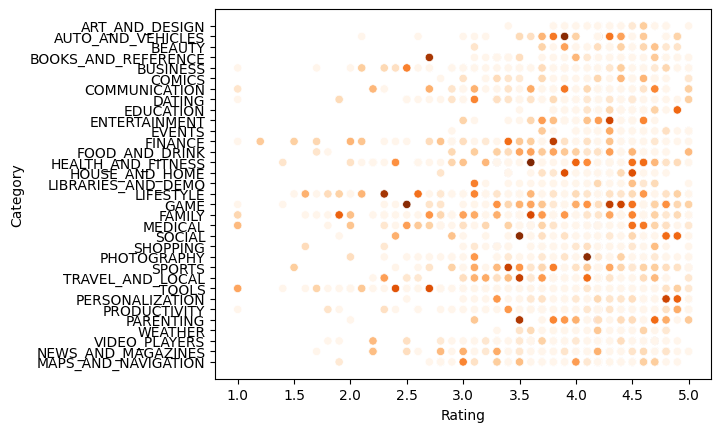

In [ ]:
# Scatterplot: Rating vs. Category with Size as Hue
sns.scatterplot(data=df1,x='Rating',y='Category',hue='Size',palette='Oranges',legend=False,size_norm='width')

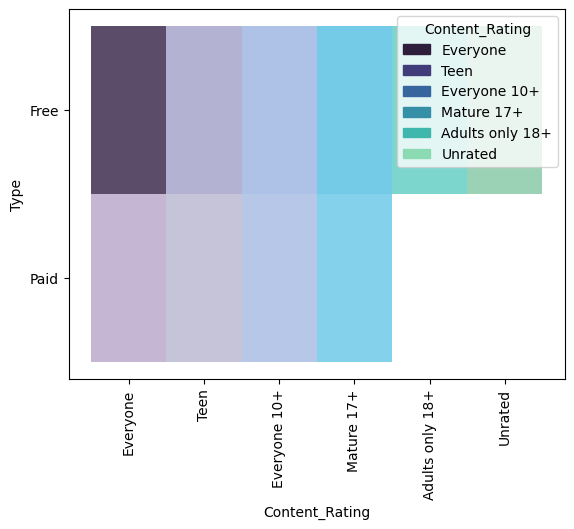

In [ ]:
# Histogram Plot: Content Rating vs. Type with Content Rating as Hue
sns.histplot(data=df1,x='Content_Rating',y='Type',palette='mako',hue='Content_Rating')
mpl.xticks(rotation=90);

In [ ]:
# Count of Prices in DataFrame df1
df1['Price'].value_counts()

0.00      9584
0.99       144
2.99       125
1.99        73
4.99        70
          ... 
389.99       1
19.90        1
1.75         1
14.00        1
1.04         1
Name: Price, Length: 92, dtype: int64

In [ ]:
# Importing matplotlib.colors module as mc

import matplotlib.colors as mc

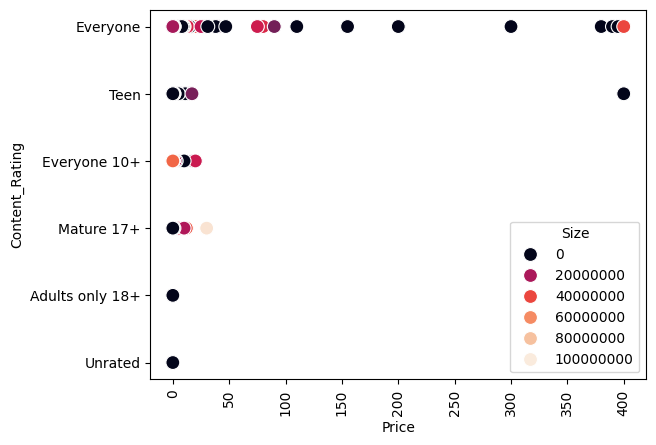

In [ ]:
# Scatterplot: Price vs. Content Rating with Size as Hue
sns.scatterplot(data=df1, x='Price', y='Content_Rating', hue='Size', palette='rocket', hue_norm=mc.PowerNorm(gamma=0.533), s=100)
mpl.xticks(rotation=90);


**NOW VISUALIZING DF2**

In [ ]:
# Count of Apps in DataFrame df2
df2['App'].value_counts()


Angry Birds Classic                                  107
Calorie Counter - Macros                             100
8fit Workouts & Meal Planner                         100
Calorie Counter - MyFitnessPal                        99
ColorNote Notepad Notes                               99
                                                    ... 
Calendar+ Schedule Planner App                         1
Daily Workouts - Exercise Fitness Routine Trainer      1
DashClock Widget                                       1
Caf - Mon Compte                                       1
CallApp: Caller ID, Blocker & Phone Call Recorder      1
Name: App, Length: 471, dtype: int64

<Axes: xlabel='Sentiment', ylabel='count'>

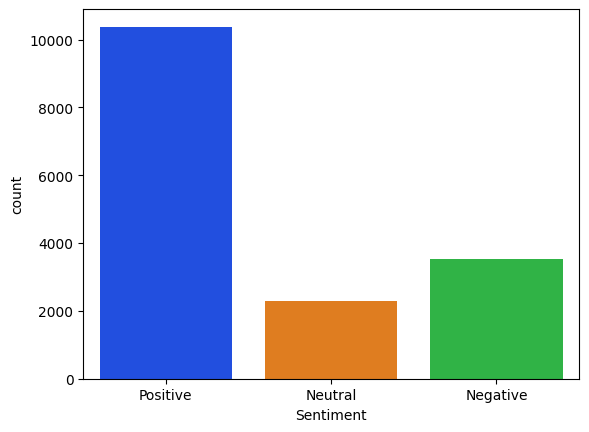

In [ ]:
# Count Plot: Sentiment Counts with Sentiment as Hue
sns.countplot(data=df2, x='Sentiment', palette='bright', hue='Sentiment')


In [ ]:
# Value Counts for Translated Reviews in DataFrame df2
df2['Translated_Review'].value_counts()

Good                                                                                                                                                                                                                     74
Nice                                                                                                                                                                                                                     57
Great                                                                                                                                                                                                                    49
Love                                                                                                                                                                                                                     43
Awesome                                                                                                                 

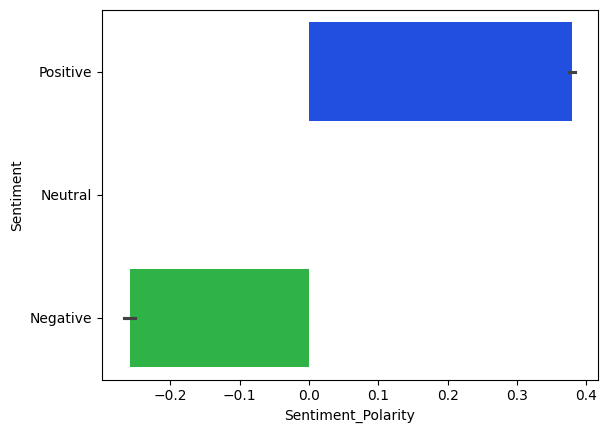

In [ ]:
# Bar Plot: Sentiment Polarity vs. Sentiment with Sentiment as Hue
sns.barplot(data=df2, x='Sentiment_Polarity', y='Sentiment', hue='Sentiment', palette='bright');


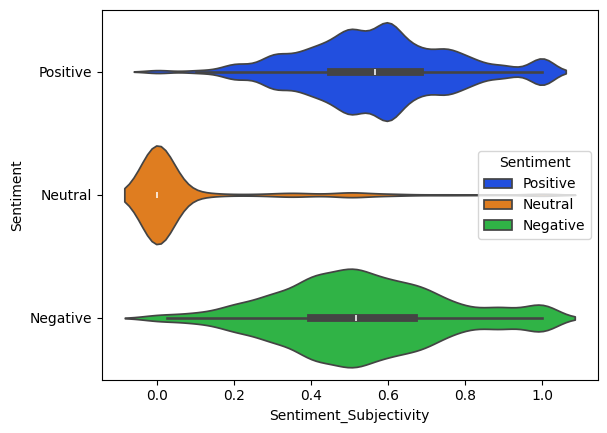

In [ ]:
# Violin Plot: Sentiment Subjectivity vs. Sentiment with Sentiment as Hue
sns.violinplot(data=df2, x='Sentiment_Subjectivity', y='Sentiment', palette='bright', hue='Sentiment', legend=True);


<ipython-input-88-ecc40b905632>:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df2, x='Sentiment_Polarity', linewidth=5, hue='Sentiment', palette='bright');


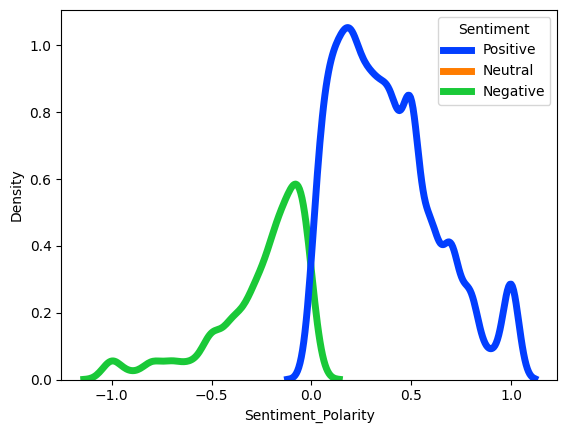

In [ ]:
# Kernel Density Estimation Plot: Sentiment Polarity with Sentiment as Hue
sns.kdeplot(data=df2, x='Sentiment_Polarity', linewidth=5, hue='Sentiment', palette='bright');


In [ ]:
# Count of Unique Apps in DataFrame df2
df2['App'].value_counts()

Angry Birds Classic                                  107
Calorie Counter - Macros                             100
8fit Workouts & Meal Planner                         100
Calorie Counter - MyFitnessPal                        99
ColorNote Notepad Notes                               99
                                                    ... 
Calendar+ Schedule Planner App                         1
Daily Workouts - Exercise Fitness Routine Trainer      1
DashClock Widget                                       1
Caf - Mon Compte                                       1
CallApp: Caller ID, Blocker & Phone Call Recorder      1
Name: App, Length: 471, dtype: int64

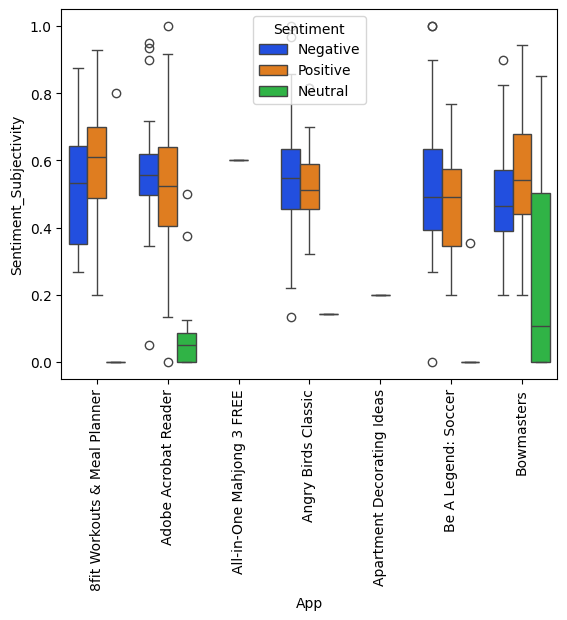

In [ ]:
# Boxplot: Sentiment Subjectivity by App with Sentiment as Hue

sns.boxplot(data=df2[df2['App'].isin(['Angry Birds Classic','8fit Workouts & Meal Planner','Be A Legend: Soccer','Adobe Acrobat Reader','Bowmasters',
                                      'All-in-One Mahjong 3 FREE','Apartment Decorating Ideas','Best Ovulation Tracker Fertility Calendar App Glow '])],
            x='App',y='Sentiment_Subjectivity',hue='Sentiment',palette='bright')
mpl.xticks(rotation=90);

In [ ]:
# Value Counts for Translated Reviews in DataFrame df2
df2['Translated_Review'].value_counts()

Good                                                                                                                                                                                                                     74
Nice                                                                                                                                                                                                                     57
Great                                                                                                                                                                                                                    49
Love                                                                                                                                                                                                                     43
Awesome                                                                                                                 

In [ ]:
# Display the first 5 rows of the DataFrame
df2.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


<Axes: xlabel='Sentiment_Polarity', ylabel='Count'>

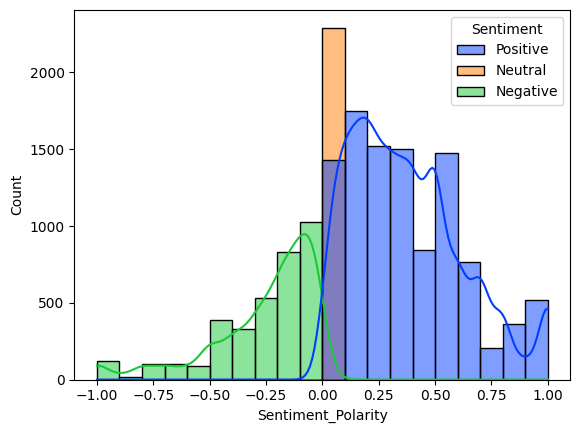

In [ ]:
# Histogram Plot: Sentiment Polarity with Sentiment as Hue
sns.histplot(data=df2,x='Sentiment_Polarity',bins=20,hue='Sentiment',palette='bright',kde=True,element='bars')

<Axes: xlabel='Sentiment_Subjectivity', ylabel='Frequency'>

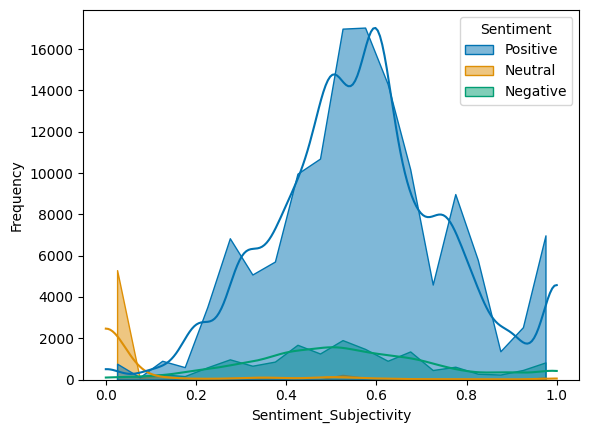

In [ ]:
# Histogram Plot: Sentiment Subjectivity with Sentiment as Hue
sns.histplot(data=df2,x='Sentiment_Subjectivity',bins=20,hue='Sentiment',palette='colorblind',stat='frequency',alpha=0.5,kde=True,element='poly')

<Axes: xlabel='Sentiment_Polarity', ylabel='Sentiment'>

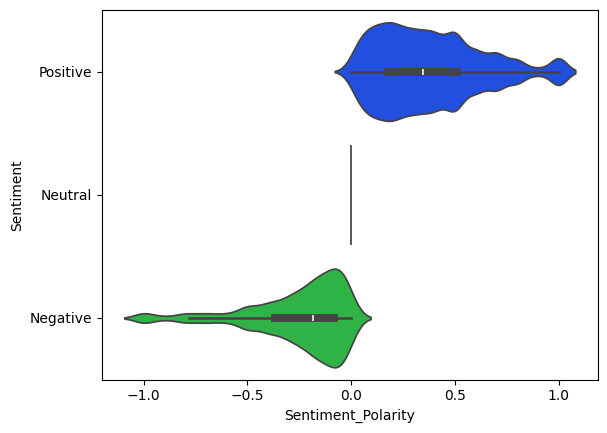

In [ ]:
# Violin Plot: Sentiment Polarity vs. Sentiment with Sentiment as Hue
sns.violinplot(data=df2,x='Sentiment_Polarity',y='Sentiment',hue='Sentiment',palette='bright')

In [ ]:
#negative_app = df2[df2['Sentiment']=='Negative']
#negative_app = df2[df2['Sentiment']=='Positive']
#df2[df2['Sentiment']=='Negative']['App'].head()


In [ ]:
# Displaying the Columns of DataFrame df1 and df2
df1.columns , df2.columns

(Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
        'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
        'Android_Ver'],
       dtype='object'),
 Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
        'Sentiment_Subjectivity'],
       dtype='object'))

In [ ]:
c2  = df1.merge(df2,how='outer',on='App')

In [ ]:
c2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
2,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
3,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33058,Dil Mil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,When I launch app..It always ask verify phone ...,Neutral,0.000,0.000000
33059,Dil Mil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crashed several times.,Neutral,0.000,0.000000
33060,Dil Mil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I noticed,Neutral,0.000,0.000000
33061,Dil Mil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Shows people 1000 miles away,Neutral,0.000,0.000000


In [ ]:
c2.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
c2.isna().sum()

App                          0
Category                  1079
Rating                    1079
Reviews                   1079
Size                      1079
Installs                  1079
Type                      1079
Price                     1079
Content_Rating            1079
Genres                    1079
Last_Updated              1079
Current_Ver               1079
Android_Ver               1079
Translated_Review         9765
Sentiment                 9765
Sentiment_Polarity        9765
Sentiment_Subjectivity    9765
dtype: int64

In [ ]:
c2['Sentiment'].value_counts().sum()

23298

In [ ]:
c2.dropna(subset=['Category'],how='all',inplace=True)

In [ ]:
c2.isna().sum()

App                          0
Category                     0
Rating                       0
Reviews                      0
Size                         0
Installs                     0
Type                         0
Price                        0
Content_Rating               0
Genres                       0
Last_Updated                 0
Current_Ver                  0
Android_Ver                  0
Translated_Review         9765
Sentiment                 9765
Sentiment_Polarity        9765
Sentiment_Subjectivity    9765
dtype: int64

In [ ]:
#
c2.dropna(subset=['Translated_Review'],how='all',inplace=True)

In [ ]:
# checking if any null values present after cleaning
c2.isna().sum()

App                       0
Category                  0
Rating                    0
Reviews                   0
Size                      0
Installs                  0
Type                      0
Price                     0
Content_Rating            0
Genres                    0
Last_Updated              0
Current_Ver               0
Android_Ver               0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [ ]:
# visualizing the dataframe after cleaning
c2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
2,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725000,0.833333
3,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500000,0.600000
5,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800000,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31030,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941.0,0.0,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Overall great app. Best gallery seen far,Positive,0.475000,0.512500
31031,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941.0,0.0,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,"Recommended, 100% love it, keep good work dev ...",Positive,0.566667,0.733333
31032,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941.0,0.0,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Too much ads,Positive,0.200000,0.200000
31033,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941.0,0.0,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Just allow time ...,Neutral,0.000000,0.000000


In [ ]:
# Getting information about its dtype and count etc
c2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22219 entries, 1 to 31034
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     22219 non-null  object 
 1   Category                22219 non-null  object 
 2   Rating                  22219 non-null  float64
 3   Reviews                 22219 non-null  float64
 4   Size                    22219 non-null  float64
 5   Installs                22219 non-null  float64
 6   Type                    22219 non-null  object 
 7   Price                   22219 non-null  float64
 8   Content_Rating          22219 non-null  object 
 9   Genres                  22219 non-null  object 
 10  Last_Updated            22219 non-null  object 
 11  Current_Ver             22219 non-null  object 
 12  Android_Ver             22219 non-null  object 
 13  Translated_Review       22219 non-null  object 
 14  Sentiment               22219 non-null

In [ ]:
# getting summary of the dataframe
c2.describe()

,Rating,Reviews,Size,Installs,Price,Sentiment_Polarity,Sentiment_Subjectivity
count,22219.000000,2.221900e+04,2.221900e+04,2.221900e+04,22219.000000,2.221900e+04,22219.000000
mean,4.344532,2.103721e+06,2.431121e+07,3.284124e+07,0.039711,1.650481e-01,0.497745
std,0.295421,5.293663e+06,3.059597e+07,5.944331e+07,0.601015,3.433818e-01,0.246370
min,2.600000,1.000000e+01,0.000000e+00,1.000000e+03,0.000000,-1.000000e+00,0.000000
25%,4.200000,1.899600e+04,0.000000e+00,1.000000e+06,0.000000,-2.523234e-18,0.375000
50%,4.400000,1.184390e+05,1.100000e+07,1.000000e+07,0.000000,1.333333e-01,0.516667
75%,4.600000,1.534466e+06,4.600000e+07,5.000000e+07,0.000000,3.898980e-01,0.645000
max,4.900000,4.489389e+07,9.900000e+07,5.000000e+08,9.990000,1.000000e+00,1.000000


In [ ]:
c2.duplicated().sum()

0

<Axes: xlabel='Reviews', ylabel='Size'>

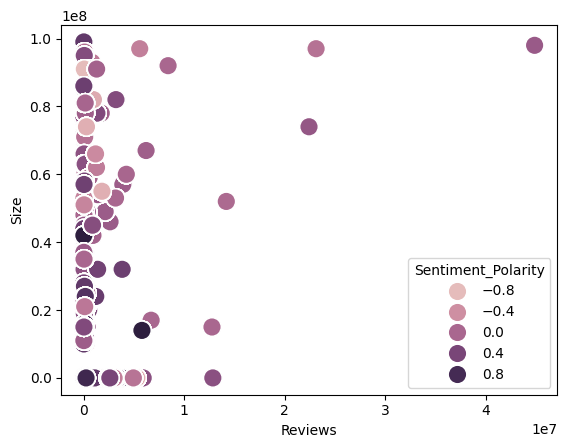

In [ ]:
# Scatterplot: Reviews vs. Size with Sentiment Polarity
sns.scatterplot(data=c2,x='Reviews',y='Size',hue='Sentiment_Polarity',hue_norm=mc.Normalize(),s=180)

In [ ]:
# Description of Translated Reviews
c2['Translated_Review'].describe()

count     22219
unique    14416
top        Good
freq         83
Name: Translated_Review, dtype: object

In [ ]:
# Count of Null Values in Translated Review Column
c2['Translated_Review'].isnull().sum()

0

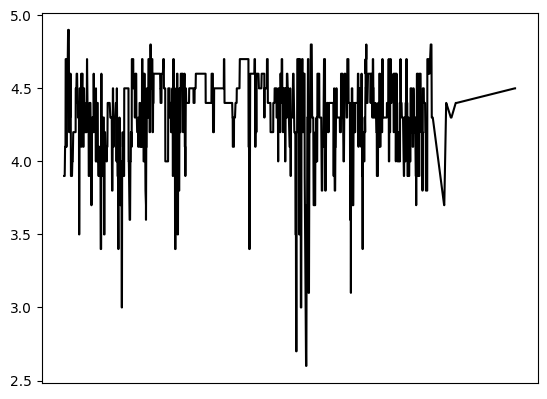

In [ ]:
# Plot of Ratings without X-axis Ticks
mpl.plot(c2['Rating'],color='black')
mpl.xticks([]);

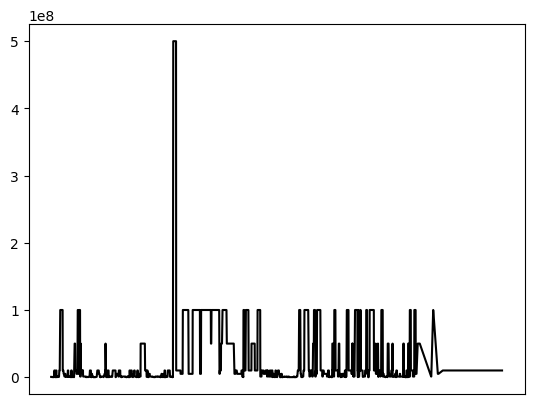

In [ ]:
# plotting Installs to see Variation
mpl.plot(c2['Installs'],color='black')
mpl.xticks([]);

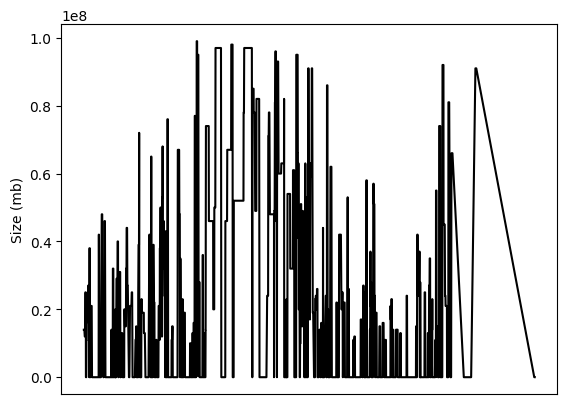

In [ ]:
# Plotting File Size Distribution
c2['Size'].plot(color='black')
mpl.ylabel('Size (mb)')
mpl.xticks([]);

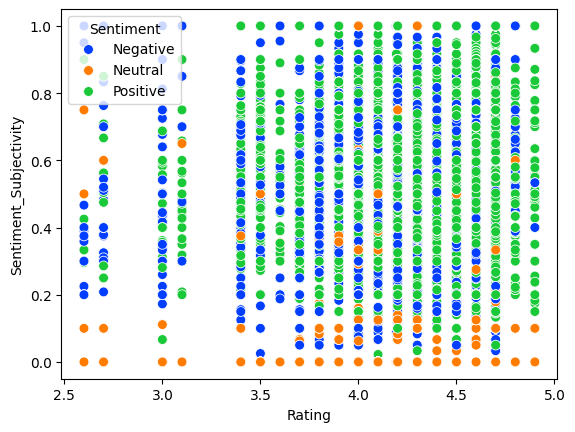

In [ ]:
# Scatterplot: Rating vs. Sentiment Subjectivity
sns.scatterplot(data=c2,x='Rating',y='Sentiment_Subjectivity',hue='Sentiment',palette='bright',s=50);


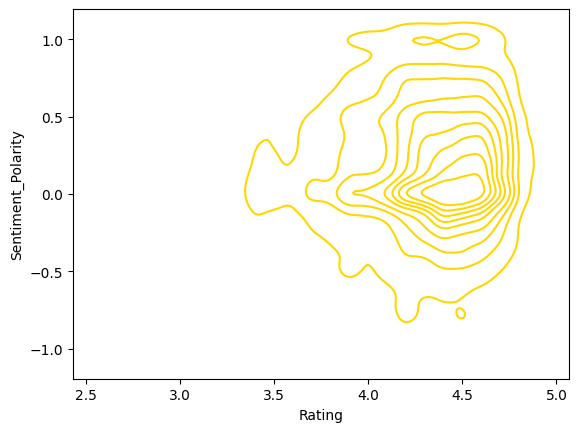

In [ ]:
# Kernel Density Estimation Plot: Rating vs. Sentiment Polarity
sns.kdeplot(data=c2,x='Rating',y='Sentiment_Polarity',color='gold');

<Axes: xlabel='Installs', ylabel='Rating'>

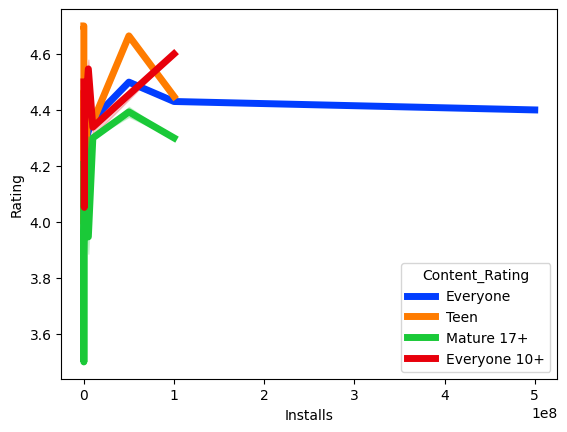

In [ ]:
# Lineplot of Rating vs. Installs by Content Rating
sns.lineplot(data=c2,x='Installs',y='Rating',hue='Content_Rating',palette='bright',linewidth=5)

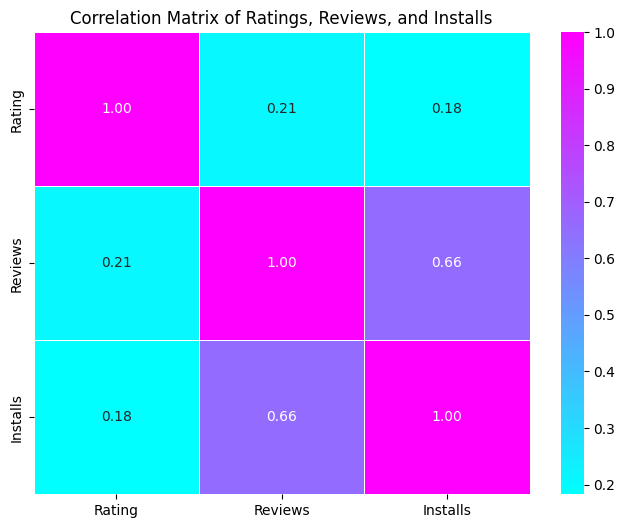

In [ ]:

# Selecting relevant numerical columns for correlation analysis
numerical_columns = ['Rating', 'Reviews', 'Installs']

# Creating a correlation matrix
correlation_matrix = c2[numerical_columns].corr()

# Visualizing the correlation matrix using a heatmap
mpl.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='cool', fmt=".2f", linewidths=0.5)
mpl.title('Correlation Matrix of Ratings, Reviews, and Installs')
mpl.show()


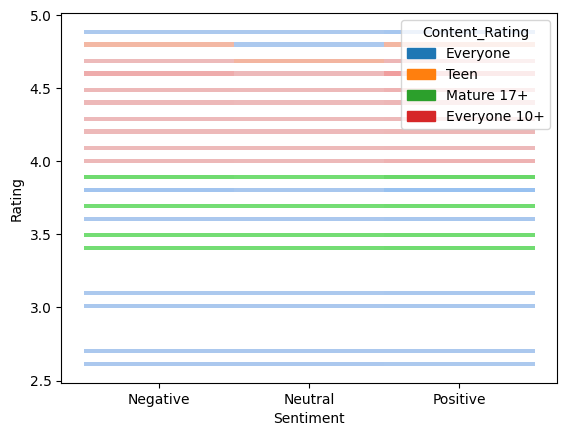

In [ ]:
# Visualization of Sentiment vs. Rating by Content Rating
sns.histplot(data=c2,x='Sentiment',y='Rating',hue='Content_Rating',stat='density');


In [ ]:
# Distribution of App Types
c2['Type'].value_counts()

Free    22102
Paid      117
Name: Type, dtype: int64

Text(0.5, 0, '(Thousands K)')

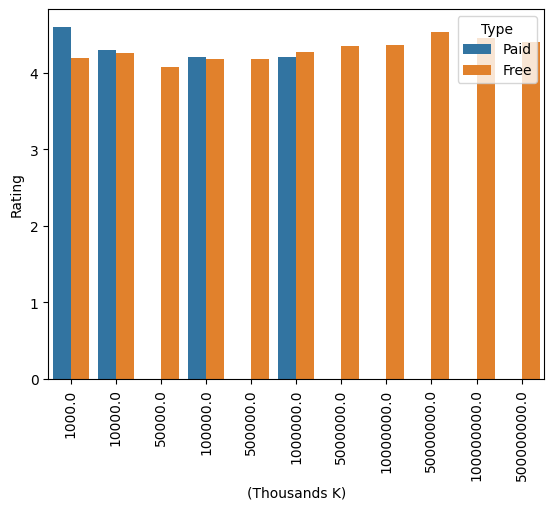

In [ ]:
# Barplot of Ratings vs. Installs by Type
sns.barplot(data=c2,x='Installs',y='Rating',hue='Type',errorbar=None)
mpl.xticks(rotation=90);
mpl.xlabel("(Thousands K)")

**Conclusion**



 These are my specific conclusions below:

**1. App Ratings:**

- There is a positive correlation between app ratings and the number of reviews.
- Free apps tend to have higher ratings compared to paid apps.
- Apps with a "Everyone" content rating generally have higher ratings compared to apps with other content ratings.

**2. App Installs:**

- There is a positive correlation between app installs and the number of reviews.
- Games and entertainment apps tend to have higher installs compared to apps in other categories.
- Free apps tend to have higher installs compared to paid apps.

**3. User Sentiment:**

- The majority of user reviews are positive.
- Sentiment polarity and subjectivity vary across different app categories.
- There is a weak positive correlation between app ratings and sentiment polarity.

**4. App Size:**

- The distribution of app sizes is skewed towards smaller sizes.
- There is no clear relationship between app size and ratings or installs.

**5. App Type:**

- Free apps dominate the Google Play Store, followed by paid apps.
- Games and entertainment apps are the most popular app types.

**6. Content Rating:**

- Apps with a "Everyone" content rating have the highest average rating.
- Apps with a "Mature 17+" content rating have the lowest average rating.

**7. Correlation between Features:**

- There is a positive correlation between app ratings and the number of reviews.
- There is a positive correlation between app installs and the number of reviews.
- There is a weak positive correlation between app ratings and sentiment polarity.

**8. Recommendations:**

1 **Developers should focus on creating high-quality apps with positive user reviews to attract more installs**.

2 **Free apps tend to perform better in terms of ratings and installs compared to paid apps**.

3 **Developers should consider targeting the "Everyone" content rating to reach a wider audience and potentially improve app ratings**.

4 **App size does not seem to have a significant impact on ratings or installs**.

5 **Developers should focus on creating apps in popular categories such as games and entertainment to increase the chances of success**.

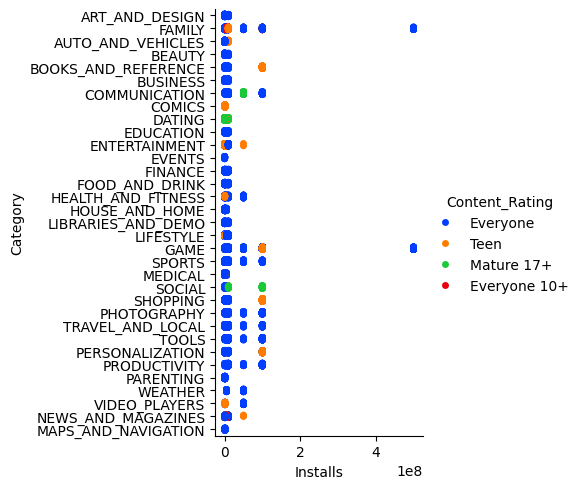

In [ ]:
sns.catplot(data=c2,x='Installs',y='Category',hue='Content_Rating',palette='bright')

In [ ]:
c2.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
2,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333


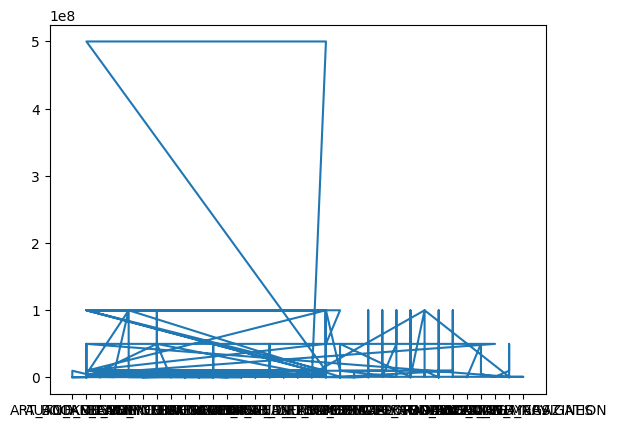

In [ ]:
mpl.plot(c2['Category'],c2['Installs'])